Saving DS Internship - EDA - Data.xlsx to DS Internship - EDA - Data.xlsx


<ipython-input-1-9cf6f76419f4>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Store Close'] = pd.to_datetime(df['Store Close'], errors='coerce')


Total Sales by Year:
Year
2015    1.627585e+09
2016    1.843939e+09
2017    1.651322e+09
2018    1.492340e+09
2019    1.471963e+09
2020    6.510899e+07
Name: Sales, dtype: float64
Number of stores opened in 1991: 4
Number of remodeled stores: 830


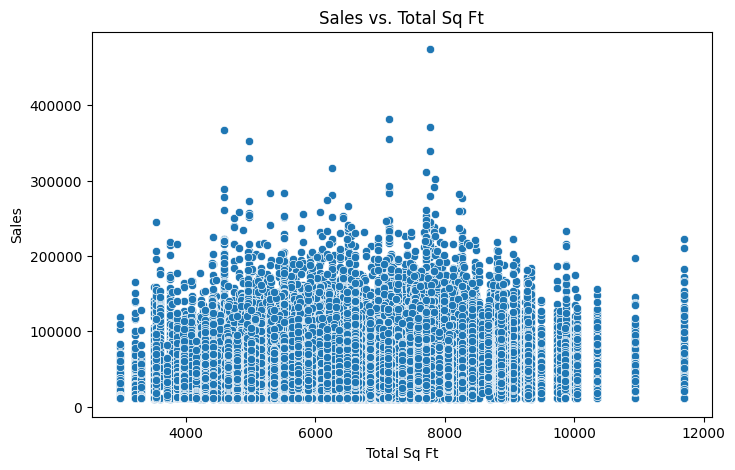

Most profitable Super Division: GIRLS
Number of active stores: 678
Super Division with highest avg. sq. ft: KIDS
Top 3 potential states for new stores:
State
B10    866596553.3
B8     472226869.2
A5     458804278.1
Name: Sales, dtype: float64


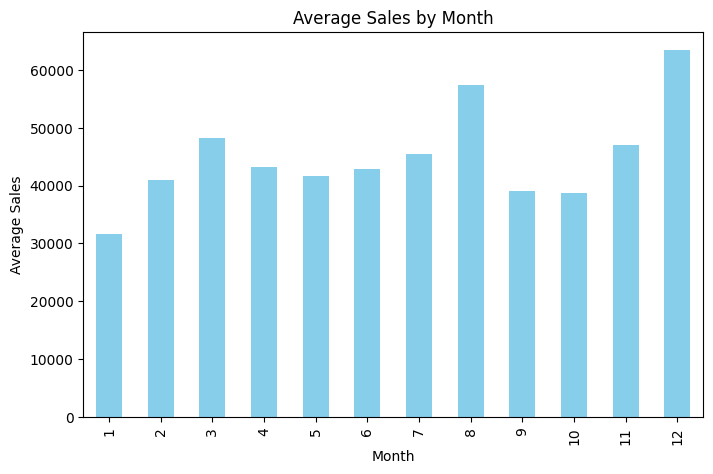

Outlet-Type Effects on Store Closures:
Outlet Type
Mall      36
Outlet    37
Strip     79
Name: Store, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_excel(next(iter(uploaded)))  # Read the file

# Convert date columns to datetime format
df['Store Open'] = pd.to_datetime(df['Store Open'], errors='coerce')
df['Store Close'] = pd.to_datetime(df['Store Close'], errors='coerce')
df['Store Modification Date'] = pd.to_datetime(df['Store Modification Date'], errors='coerce')

# 1. Total Sales by Year
total_sales_by_year = df.groupby('Year')['Sales'].sum()
print("Total Sales by Year:")
print(total_sales_by_year)

# 2. Number of stores opened in 1991
stores_opened_1991 = df[df['Store Open'].dt.year == 1991]['Store'].nunique()
print(f"Number of stores opened in 1991: {stores_opened_1991}")

# 3. Number of stores remodeled
remodeled_stores = df[df['Store Modification'].notna()]['Store'].nunique()
print(f"Number of remodeled stores: {remodeled_stores}")

# 4. Relationship between Sales and Total Sq. Ft
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total Sq Ft'], y=df['Sales'])
plt.title("Sales vs. Total Sq Ft")
plt.xlabel("Total Sq Ft")
plt.ylabel("Sales")
plt.show()

# 5. Most profitable Super Division
most_profitable_division = df.groupby('Super Division')['Sales'].sum().idxmax()
print(f"Most profitable Super Division: {most_profitable_division}")

# 6. Number of active stores
active_stores = df[df['Store Close'].isna()]['Store'].nunique()
print(f"Number of active stores: {active_stores}")

# 7. Super Division with highest avg. sq. ft
largest_sqft_division = df.groupby('Super Division')['Total Sq Ft'].mean().idxmax()
print(f"Super Division with highest avg. sq. ft: {largest_sqft_division}")

# 8. Top 3 potential states for new stores
top_states = df.groupby('State')['Sales'].sum().nlargest(3)
print("Top 3 potential states for new stores:")
print(top_states)

# 9. Best time of year to open a store
plt.figure(figsize=(8,5))
df.groupby('Month')['Sales'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

# 10. Outlet-Type effects on store closures
closed_stores = df[~df['Store Close'].isna()]
outlet_effect = closed_stores.groupby('Outlet Type')['Store'].nunique()
print("Outlet-Type Effects on Store Closures:")
print(outlet_effect)
